<a href="https://colab.research.google.com/github/Shrez7961/Practice/blob/main/Day_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PYTHON**

## 1. Write a Python program to calculate the average of the numbers a through b ( b not included ) rounded to nearest integer, in binary (or -1 if there are no such numbers).



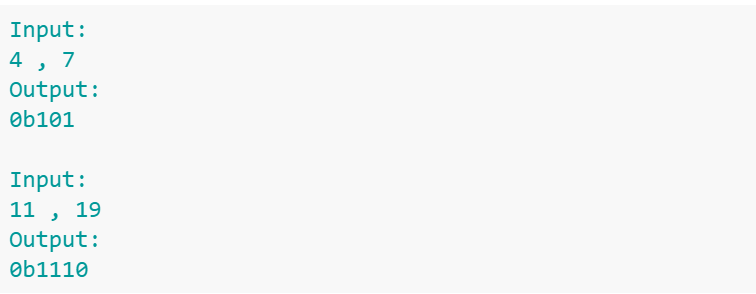

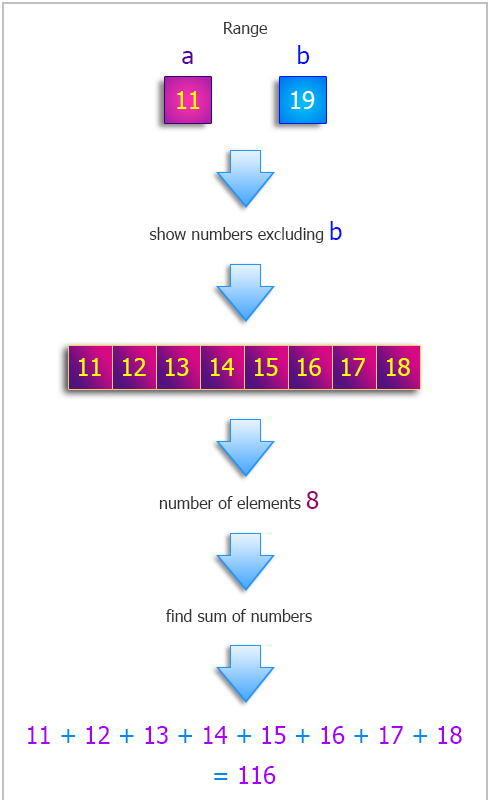

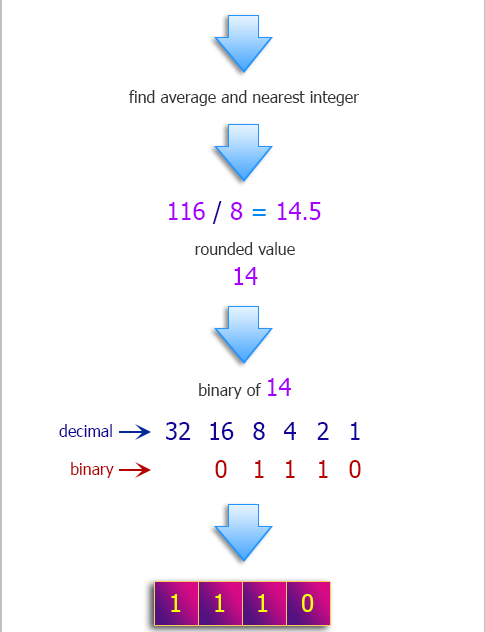

In [5]:
# Write Your code here.
def binary_mean(a,b):
  range_ = range(a,b)
  if len(range_) == 0:
      return "-1"
  return bin(round(sum(range_) / len(range_)))


In [7]:
print(binary_mean(4,7))
print(binary_mean(11,19))

0b101
0b1110


## 2. Write a Python program to find the sublist of numbers from a given list of numbers with only odd digits in increasing order.

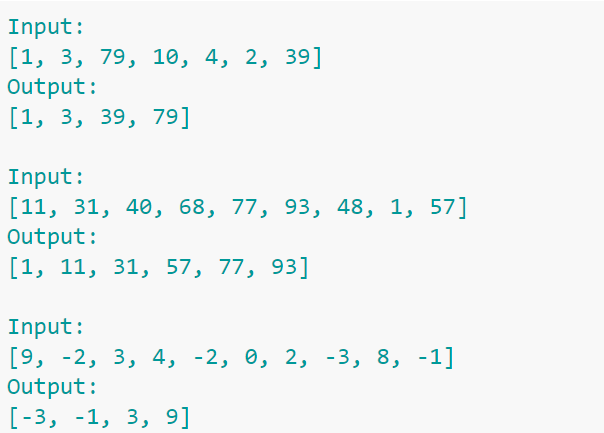

In [ ]:
# Write Your code here.
def return_odds(lst):
  return sorted(x for x in lst if x%2!=0)

In [ ]:
inp = [1, 3, 79, 10, 4, 2, 39]
inp2=[11, 31, 40, 68, 77, 93, 48, 1, 57]
inp3 = [9, -2, 3, 4, -2, 0, 2, -3, 8, -1]
print(return_odds(inp))
print(return_odds(inp2))
print(return_odds(inp3))

[1, 3, 39, 79]
[1, 11, 31, 57, 77, 93]
[-3, -1, 3, 9]


# **SQL**



## 3. From the following dataframe, write a SQL query to display those items that were only sold in the 2nd quarter of a year, i.e. April 1st to June end for the year 2020. Return item code and item description.


**Create Dataframe 1:item**

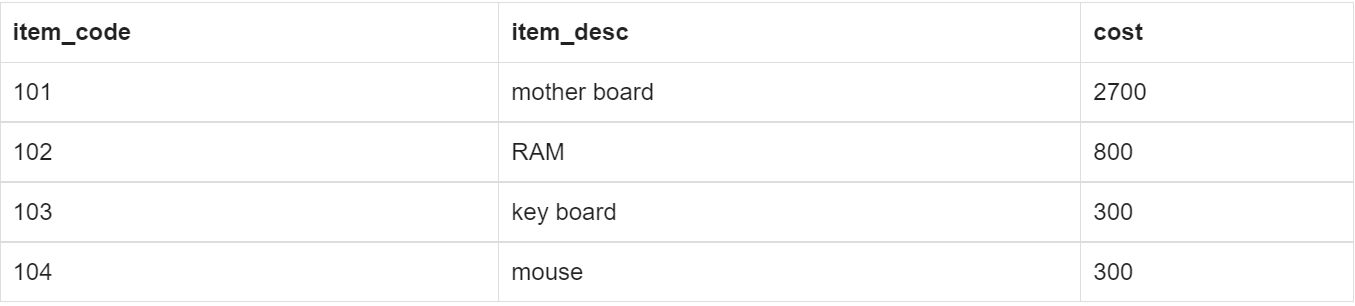

**Create Dataframe 2: sales_info**

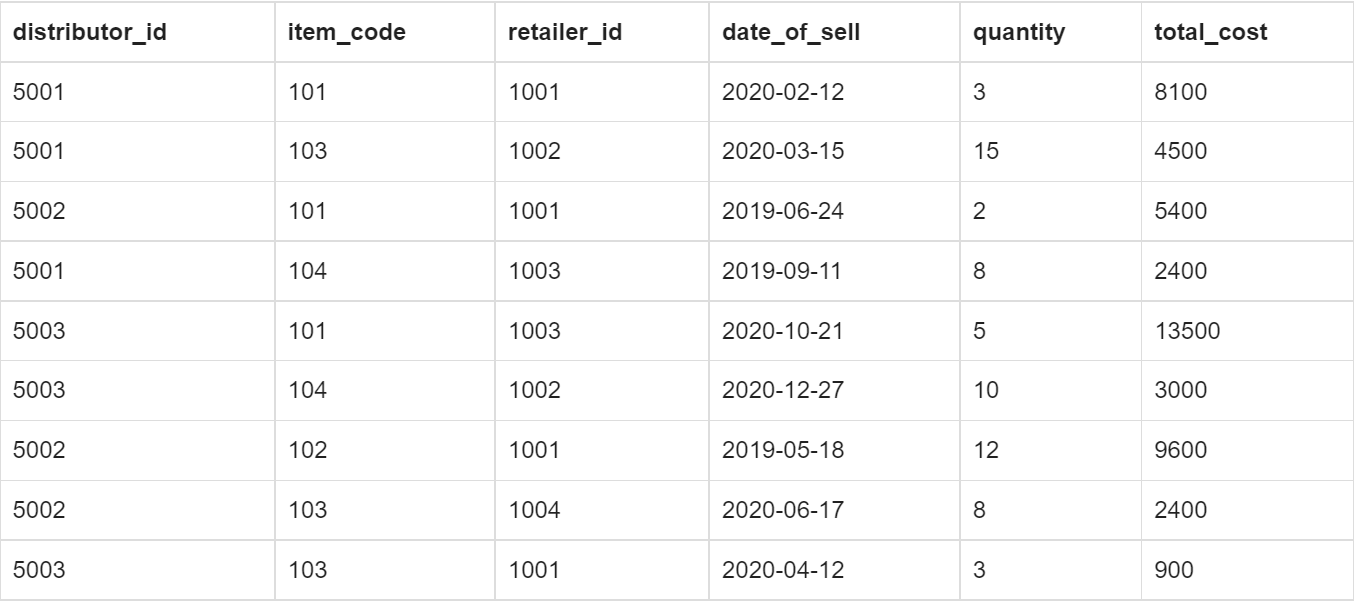

**Expected Output:**

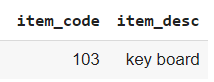

In [ ]:
# Install SQlite & Pandasql
!pip install db-sqlite3
!pip install pandasql

# Importing Libraries
import pandas as pd
import sqlite3
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())


# Connection to DataBase
conn = sqlite3.connect('test5_database') 
c = conn.cursor()

# Create table
c.execute('''DROP TABLE IF EXISTS item;''')

c.execute('''CREATE TABLE item (
[item_code] INTEGER,
[item_desc] VARCHAR,
[cost]  INTEGER);''')


          
# Insert data into table          
c.execute('''INSERT INTO item VALUES(101,'mother board',	2700);''') 
c.execute('''INSERT INTO item VALUES(102,'RAM',	800);''') 
c.execute('''INSERT INTO item VALUES(103,'key board',300);''') 
c.execute('''INSERT INTO item VALUES(104,'mouse',300);''') 



# Create table
c.execute('''DROP TABLE IF EXISTS sales_info;''')

c.execute('''CREATE TABLE sales_info (
[distributor_id] INTEGER,
[item_code] INTEGER,
[retailer_id]  INTEGER,
[date_of_sell] DATE,
[quantity] INTEGER,
[total_cost] INTEGER);''')


          
# Insert data into table          
c.execute('''INSERT INTO sales_info VALUES(5001,101,1001,'2020-02-12',3,8100);''')
c.execute('''INSERT INTO sales_info VALUES(5001,103,1002,'2020-03-15',15,4500);''')
c.execute('''INSERT INTO sales_info VALUES(5002,101,1001,'2019-06-24',2,5400);''')
c.execute('''INSERT INTO sales_info VALUES(5001,104,1003,'2019-09-11',8,2400);''')
c.execute('''INSERT INTO sales_info VALUES(5003,101,1003,'2020-10-21',5,13500);''')
c.execute('''INSERT INTO sales_info VALUES(5003,104,1002,'2020-12-27',10,3000);''')
c.execute('''INSERT INTO sales_info VALUES(5002,102,1001,'2019-05-18',12,9600);''')
c.execute('''INSERT INTO sales_info VALUES(5002,103,1004,'2020-06-17',8,2400);''')
c.execute('''INSERT INTO sales_info VALUES(5003,103,1001,'2020-04-12',3,900);''')

conn.commit()

# Get DataFrame
conn = sqlite3.connect('test5_database') 
item = pd.read_sql_query ('''SELECT * FROM item''',conn)
sales_info = pd.read_sql_query ('''SELECT * FROM sales_info''',conn)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 171 kB 14.6 MB/s 
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1794 sha256=8a53a2dc503bb99766b3ab665c60b69de3893275faf5efd601800f70145eb012
  Stored in directory: /root/.cache/pip/wheels/02/38/d5/2f54461050571bf5330fee2a37ab1c9b5e7540b0572f1acdab
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3895 sha256=77a9ed934b4fb7f1234aee7b9cbb601d15f8fc2c8a92848daa330f9d4e70a670
  Stored in directory: /root/.cache/pip/wheels/8e/97/82/741d2b360507411ec233d0280d7371faa94b03bde834e4a9be
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31679 sha256=5be82b9980b80796ea72f77fbdc4886b848a6829bcac751f4f118c461015382a
  Stored in directory: /root/.cache/pip/wheels/c5/43/70/e9729370cfff40c49d3e3d05377d54b3ecd71f64e62341ea80
Successfully built db-sqlite3 db antiorm
Looking in indexes: https://pyp

In [ ]:
# Write Your code here.
mysql('''
SELECT item_code, item_desc
FROM item
WHERE item_code IN (
SELECT item_code
FROM sales_info
WHERE date_of_sell BETWEEN '2020-04-01' AND '2020-06-30'
)''')

,item_code,item_desc
0,103,key board


## 4. From the following dataframe, write a SQL query to find the highest purchase with its corresponding item for each customer. In case of a same quantity purchase find the item code which is smallest.
## The output must be sorted by increasing of customer_id. Return customer ID,lowest item code and purchase quantity.

**Expected Output:** 


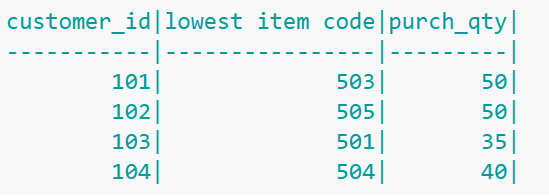

In [ ]:
# Install SQlite & Pandasql
!pip install db-sqlite3
!pip install pandasql

# Importing Libraries
import pandas as pd
import sqlite3
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())


# Connection to DataBase
conn = sqlite3.connect('test6_database') 
c = conn.cursor()

# Create table
c.execute('''DROP TABLE IF EXISTS purchase;''')

c.execute('''CREATE TABLE purchase (
[customer_id] INTEGER,
[item_code] INTEGER,
[purch_qty]  INTEGER);''')


          
# Insert data into table          
c.execute('''INSERT INTO purchase VALUES (101,504,25 );''')
c.execute('''INSERT INTO purchase VALUES (101,503,50 );''')
c.execute('''INSERT INTO purchase VALUES (102,502,40 );''')
c.execute('''INSERT INTO purchase VALUES (102,503,25 );''')
c.execute('''INSERT INTO purchase VALUES (102,501,45 );''')
c.execute('''INSERT INTO purchase VALUES (103,505,30 );''')
c.execute('''INSERT INTO purchase VALUES (103,503,25 );''')
c.execute('''INSERT INTO purchase VALUES (104,505,40 );''')
c.execute('''INSERT INTO purchase VALUES (101,502,25 );''')
c.execute('''INSERT INTO purchase VALUES (102,504,40 );''')
c.execute('''INSERT INTO purchase VALUES (102,505,50 );''')
c.execute('''INSERT INTO purchase VALUES (103,502,25 );''')
c.execute('''INSERT INTO purchase VALUES (104,504,40 );''')
c.execute('''INSERT INTO purchase VALUES (103,501,35 );''')


conn.commit()

# Get DataFrame
conn = sqlite3.connect('test6_database') 
purchase = pd.read_sql_query ('''SELECT * FROM purchase''',conn)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
mysql('''
SELECT * FROM purchase
''')

,customer_id,item_code,purch_qty
0,101,504,25
1,101,503,50
2,102,502,40
3,102,503,25
4,102,501,45
5,103,505,30
6,103,503,25
7,104,505,40
8,101,502,25
9,102,504,40


In [ ]:
# Write Your code here.
mysql('''
SELECT customer_id, item_code as 'lowest item code', max(purch_qty)
FROM purchase
GROUP BY customer_id
order by customer_id asc
''')

,customer_id,lowest item code,max(purch_qty)
0,101,503,50
1,102,505,50
2,103,501,35
3,104,505,40


In [ ]:
# Write Your code here.
mysql('''
SELECT customer_id, min(item_code) as 'lowest item code', purch_qty
FROM purchase
WHERE (customer_id, purch_qty) IN (SELECT customer_id, max(purch_qty) 
FROM purchase
GROUP BY customer_id)
GROUP BY customer_id, purch_qty
ORDER BY customer_id
''')

,customer_id,lowest item code,purch_qty
0,101,503,50
1,102,505,50
2,103,501,35
3,104,504,40


# **MATH**

## 5. Let X be a discrete random variable with the following PMF

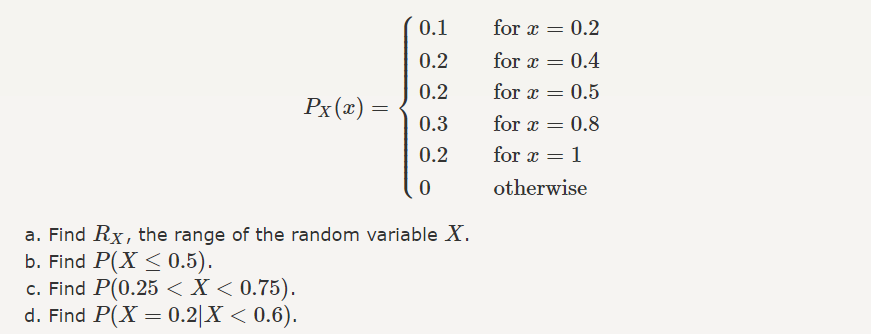

**Solve this on a piece of paper and submit the image.**



Upload Your answer here.

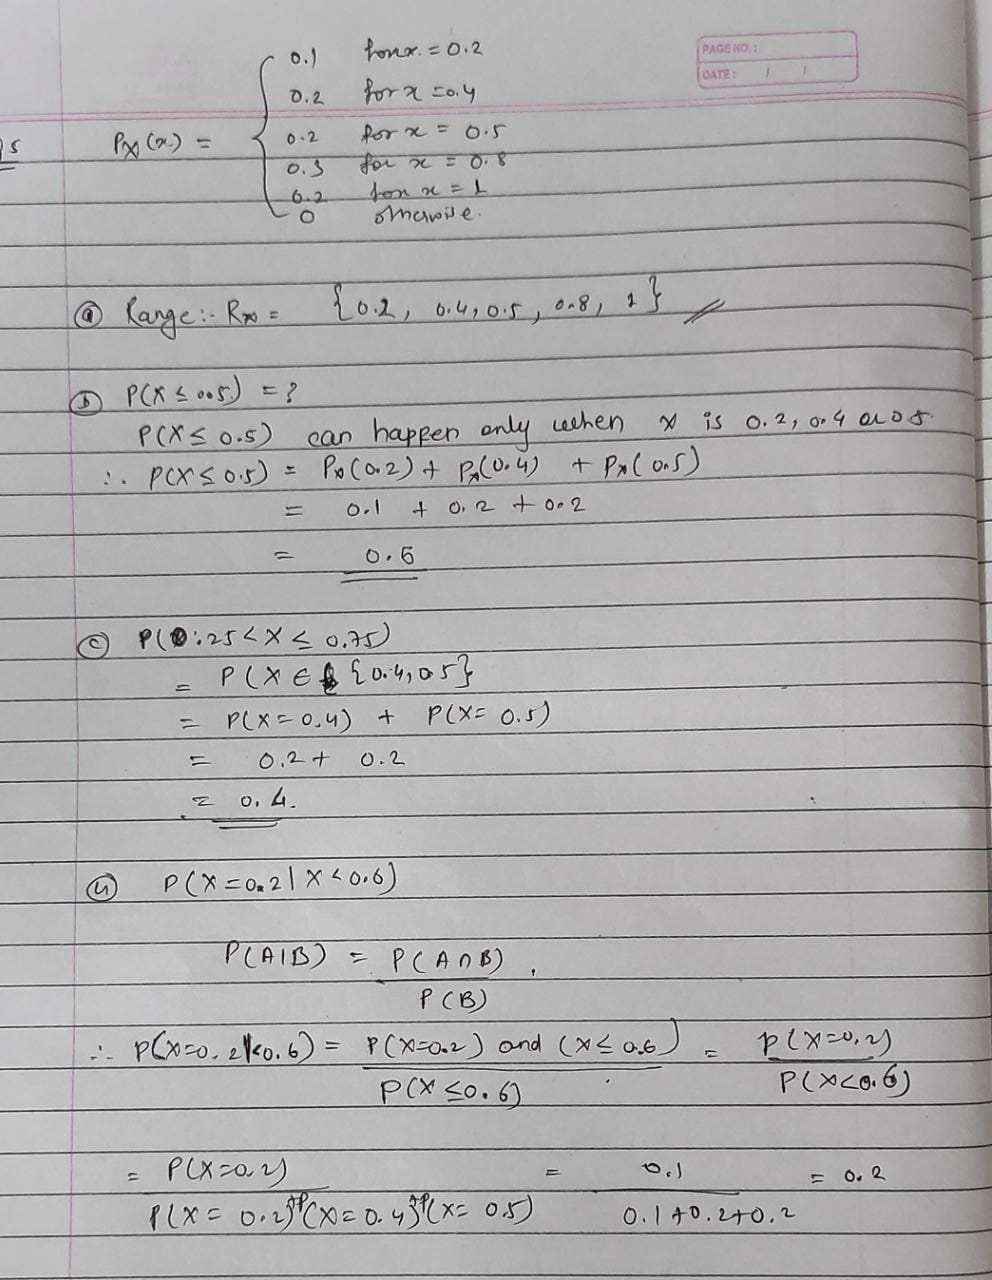

## 6. Let X be a random variable with PDF given by

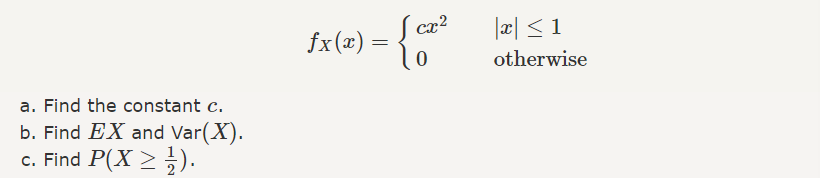

**Solve this on a piece of paper and submit the image.**

Upload Your answer here.

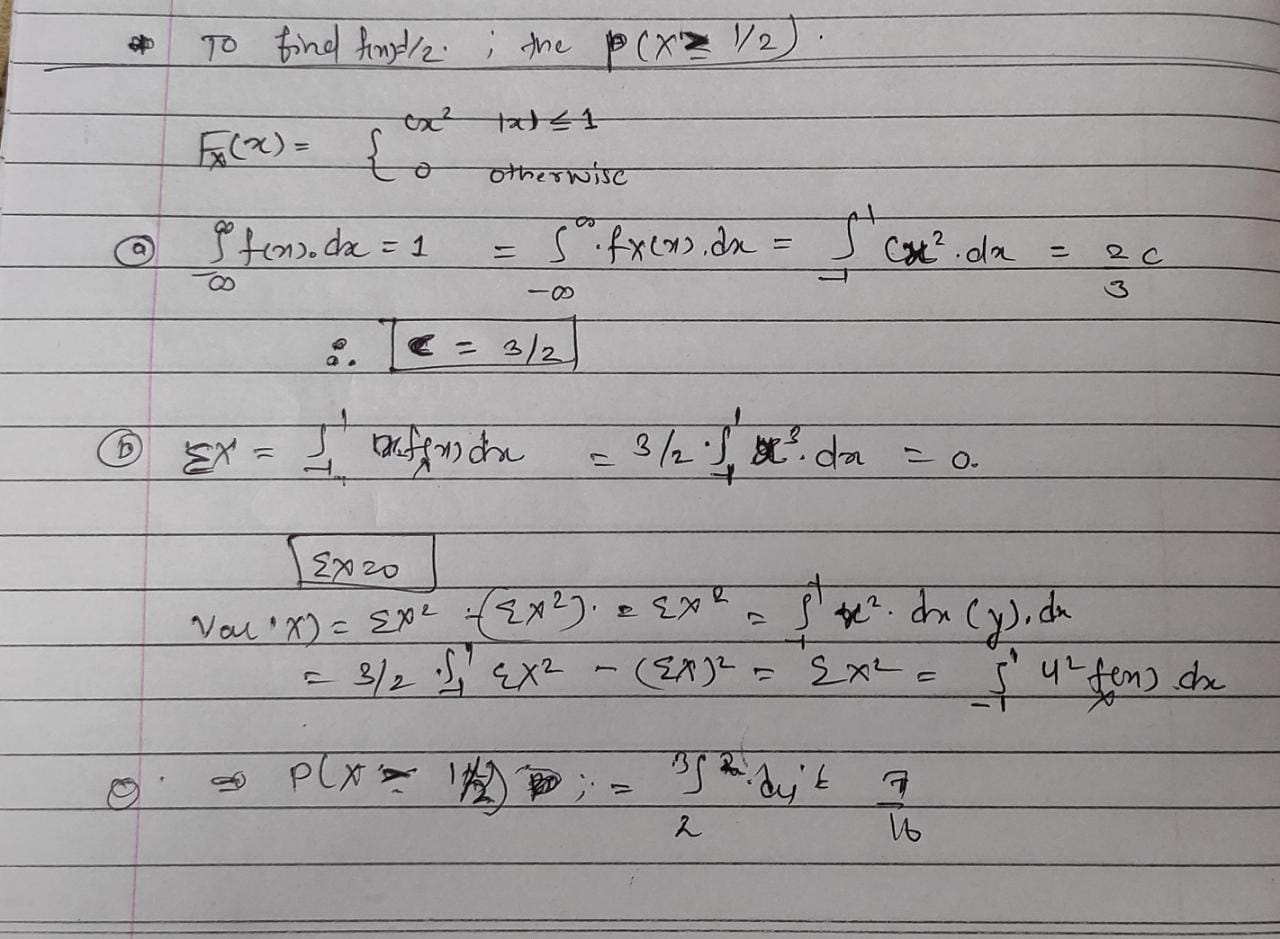

# **MACHINE LEARNING**

## 7. What is stratified cross-validation and when should we use it?

Write Your answer here.

When we split our data into folds, we want to make sure that each fold represents good split of the whole data. The most basic example is that we want the same proportion of different classes in each fold. Most of the times it happens by just doing it randomly, but sometimes, in complex datasets, we have to use a correct distribution for each fold.
By implementing the concept of stratified sampling in cross-validation, we can have the training and test sets have the same proportion of the features as in the original dataset. Doing this with the dependent variable ensures that the cross-validation result is a nearby approximation of generalization error.

## 8. Briefly explain Hyperparameter Optimization strategies and optimization strategy performance.

Write Your answer here.

Hyperparameters are different parameter values that are used to control the learning process and have a significant effect on the performance of machine learning models.

An example of hyperparameters in the Random Forest algorithm is the number of estimators (n_estimators), maximum depth (max_depth), and criterion. These parameters are tunable and can directly affect how well a model trains.

Hyperparameter optimization is the process of finding the right combination of hyperparameter values to achieve maximum performance on the data in a reasonable amount of time.

This process plays a vital role in the prediction accuracy of a machine learning algorithm. Therefore Hyperparameter optimization is considered as an important part of building machine learning models.
**Grid search** and **Random search** are two widely used hyperparameter tuning process in building a machine learning model.

**Grid search** works by trying every possible combination of parameters you want to try in your model. This means it will take a lot of time to perform the entire search which can get very computationally expensive.

**Random search** method however works a bit differently by using random combinations of the values of the hyperparameters to find the best solution.
The drawback of Random Search is that it can sometimes miss important points (values).